# Check `GDS` stack

This notebook checks all software requirements for the course Geographic Data Science are correctly installed. 

A successful run of the notebook implies no errors returned in any cell *and* every cell beyond the first one returning a printout of `True`. This ensures a correct environment installed.

---

In [1]:
import bokeh as bk
float(bk.__version__[:4]) >= 0.12

True

In [2]:
import matplotlib as mpl
float(mpl.__version__[:3]) >= 1.5

True

In [3]:
import mplleaflet as mpll

In [4]:
import seaborn as sns
float(sns.__version__[:3]) >= 0.6

True

---

In [5]:
import qgrid

In [6]:
import pandas as pd
float(pd.__version__[:4]) >= 0.18

True

In [7]:
import sklearn
float(sklearn.__version__[:4]) >= 0.17

True

In [8]:
import statsmodels.api as sm
float(sm.version.version[:3]) >= 0.6

True

In [9]:
import xlrd

In [10]:
import xlsxwriter

---

In [11]:
import clusterpy as cl
float(cl.__version__[:3]) >= 1.0

ClusterPy: Library of spatially constrained clustering algorithms


True

In [12]:
import fiona
float(fiona.__version__[:3]) >= 1.7

True

In [13]:
import geopandas as gpd
float(gpd.__version__[:3]) >= 0.2

True

In [14]:
import pysal as ps
float(ps.version[:4]) >= 1.11

True

In [15]:
import rasterio as rio

# Test

In [16]:
shp = ps.examples.get_path('columbus.shp')
db = gpd.read_file(shp)
db.head()

,AREA,COLUMBUS_,COLUMBUS_I,CP,CRIME,DISCBD,EW,HOVAL,INC,NEIG,...,NSA,NSB,OPEN,PERIMETER,PLUMB,POLYID,THOUS,X,Y,geometry
0,0.309441,2,5,0.0,15.725980,5.03,1.0,80.467003,19.531,5,...,1.0,1.0,2.850747,2.440629,0.217155,1,1000.0,38.799999,44.070000,"POLYGON ((8.624129295349121 14.23698043823242,..."
1,0.259329,3,1,0.0,18.801754,4.27,0.0,44.567001,21.232,1,...,1.0,1.0,5.296720,2.236939,0.320581,2,1000.0,35.619999,42.380001,"POLYGON ((8.252790451049805 14.23694038391113,..."
2,0.192468,4,6,0.0,30.626781,3.89,1.0,26.350000,15.956,6,...,1.0,1.0,4.534649,2.187547,0.374404,3,1000.0,39.820000,41.180000,"POLYGON ((8.653305053710938 14.00809001922607,..."
3,0.083841,5,2,0.0,32.387760,3.70,0.0,33.200001,4.477,2,...,1.0,1.0,0.394427,1.427635,1.186944,4,1000.0,36.500000,40.520000,"POLYGON ((8.459499359130859 13.82034969329834,..."
4,0.488888,6,7,0.0,50.731510,2.83,1.0,23.225000,11.252,7,...,1.0,1.0,0.405664,2.997133,0.624596,5,1000.0,40.009998,38.000000,"POLYGON ((8.685274124145508 13.63951969146729,..."


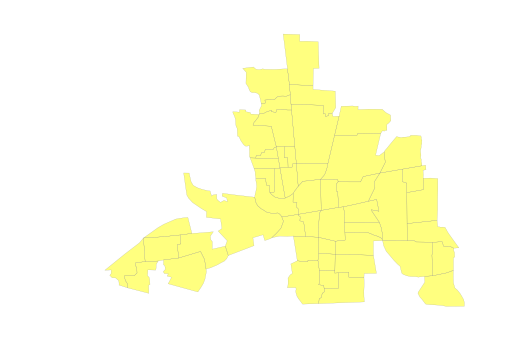

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
f, ax = plt.subplots(1)
for poly in db['geometry']:
    gpd.plotting.plot_multipolygon(ax, poly, facecolor='yellow', edgecolor='grey', linewidth=0.1)
ax.set_axis_off()
plt.show()

In [18]:
db.crs['init'] = 'epsg:26918'

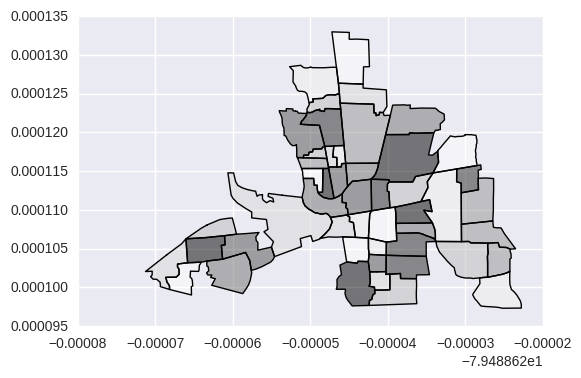

In [19]:
db_wgs84 = db.to_crs(epsg=4326)
db_wgs84.plot()
plt.show()

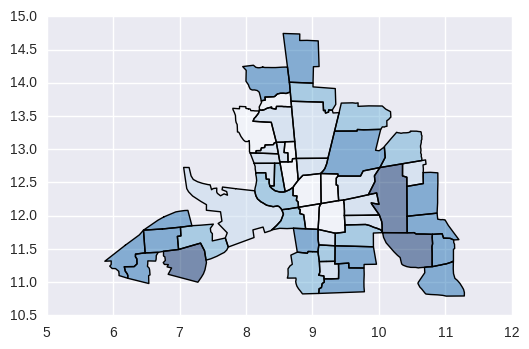

In [20]:
db.plot(column='INC', scheme='fisher_jenks', cmap=plt.matplotlib.cm.Blues)
plt.show()

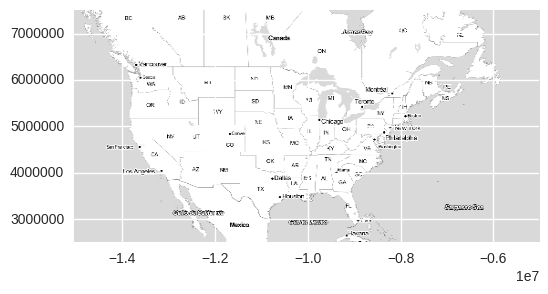

In [21]:
import numpy as np
import contextily as ctx
tl = ctx.tile_providers.ST_TONER_LITE

db = gpd.read_file(ps.examples.get_path('us48.shp'))
db.crs = {'init': 'epsg:4326'}
w, s, e, n = db.to_crs(epsg=3857).unary_union.bounds
dbp = db.to_crs(epsg=3857)
# Download raster
_ = ctx.bounds2raster(w, s, e, n, 4, 'us.tif', url=tl)
# Load up and plot
source = rio.open('us.tif', 'r')
red = source.read(1)
green = source.read(2)
blue = source.read(3)
pix = np.dstack((red, green, blue))
bounds = (source.bounds.left, source.bounds.right, \
          source.bounds.bottom, source.bounds.top)
f = plt.figure(figsize=(6, 6))
ax = plt.imshow(pix, extent=bounds)